In [45]:
### connect to the database
import sqlite3
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
import plotly.express as px
import matplotlib.patches as patches
con = sqlite3.connect('/Users/guitarboyrokin/Downloads/atliq_db.sqlite3') #-->specify the path to your 
#downloaded database just like you read csv files

### check all tables in the database
cursor = con.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

### execute simple query in Python with your connection
query="""Select * from 
dim_customer
LIMIT 10
"""
dim_customer=pd.read_sql_query(query, con)
dim_customer.head() 

[('dim_customer',), ('dim_product',), ('fact_pre_discount',), ('fact_manufacturing_cost',), ('fact_gross_price',), ('fact_sales_monthly',)]


,customer_code,customer,platform,channel,market,sub_zone,region
0,70002017,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC
1,70002018,Atliq e Store,E-Commerce,Direct,India,India,APAC
2,70003181,Atliq Exclusive,Brick & Mortar,Direct,Indonesia,ROA,APAC
3,70003182,Atliq e Store,E-Commerce,Direct,Indonesia,ROA,APAC
4,70004069,Atliq Exclusive,Brick & Mortar,Direct,Japan,ROA,APAC


In [46]:
query = """Select * from
dim_product
"""
dim_product = pd.read_sql_query(query, con)
dim_product.head(15)

,product_code,division,segment,category,product,variant
0,A0118150101,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard
1,A0118150102,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Plus
2,A0118150103,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Premium
3,A0118150104,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Premium Plus
4,A0219150201,P & A,Peripherals,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Standard
5,A0219150202,P & A,Peripherals,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Plus
6,A0220150203,P & A,Peripherals,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Premium
7,A0320150301,P & A,Peripherals,Internal HDD,AQ Zion Saga,Standard
8,A0321150302,P & A,Peripherals,Internal HDD,AQ Zion Saga,Plus
9,A0321150303,P & A,Peripherals,Internal HDD,AQ Zion Saga,Premium


In [47]:
dim_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_code  397 non-null    object
 1   division      397 non-null    object
 2   segment       397 non-null    object
 3   category      397 non-null    object
 4   product       397 non-null    object
 5   variant       397 non-null    object
dtypes: object(6)
memory usage: 18.7+ KB


In [48]:
query = """Select * 
from fact_gross_price
"""
fact_gross_price = pd.read_sql_query(query, con)
fact_gross_price.head(15)

,product_code,fiscal_year,gross_price
0,A0118150101,2018,15.3952
1,A0118150101,2019,14.4392
2,A0118150101,2020,16.2323
3,A0118150101,2021,19.0573
4,A0118150102,2018,19.5875
5,A0118150102,2019,18.5595
6,A0118150102,2020,19.8577
7,A0118150102,2021,21.4565
8,A0118150103,2018,19.3630
9,A0118150103,2019,19.3442


In [49]:
fact_gross_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_code  1182 non-null   object 
 1   fiscal_year   1182 non-null   int64  
 2   gross_price   1182 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 27.8+ KB


In [50]:
query = """Select * from
fact_manufacturing_cost
"""
fact_manufacturing_cost = pd.read_sql_query(query, con)
fact_manufacturing_cost.head(15)


,product_code,cost_year,manufacturing_cost
0,A0118150101,2018,4.6190
1,A0118150101,2019,4.2033
2,A0118150101,2020,5.0207
3,A0118150101,2021,5.5172
4,A0118150102,2018,5.6036
5,A0118150102,2019,5.3235
6,A0118150102,2020,5.7180
7,A0118150102,2021,6.2835
8,A0118150103,2018,5.9469
9,A0118150103,2019,5.5306


In [51]:
fact_manufacturing_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_code        1182 non-null   object 
 1   cost_year           1182 non-null   int64  
 2   manufacturing_cost  1182 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 27.8+ KB


In [52]:
total_price = fact_gross_price.merge(fact_manufacturing_cost, how='left', on = 'product_code')
total_price

,product_code,fiscal_year,gross_price,cost_year,manufacturing_cost
0,A0118150101,2018,15.3952,2018,4.6190
1,A0118150101,2018,15.3952,2019,4.2033
2,A0118150101,2018,15.3952,2020,5.0207
3,A0118150101,2018,15.3952,2021,5.5172
4,A0118150101,2019,14.4392,2018,4.6190
...,...,...,...,...,...
4197,A7321160302,2022,46.0399,2022,13.1954
4198,A7321160303,2021,42.8483,2021,12.9502
4199,A7321160303,2021,42.8483,2022,13.3387
4200,A7321160303,2022,43.5559,2021,12.9502


In [53]:
total_price['gross_margin'] = ((total_price['gross_price'] - total_price['manufacturing_cost']) / total_price['gross_price'] * 100)
total_price

,product_code,fiscal_year,gross_price,cost_year,manufacturing_cost,gross_margin
0,A0118150101,2018,15.3952,2018,4.6190,69.997142
1,A0118150101,2018,15.3952,2019,4.2033,72.697334
2,A0118150101,2018,15.3952,2020,5.0207,67.387887
3,A0118150101,2018,15.3952,2021,5.5172,64.162856
4,A0118150101,2019,14.4392,2018,4.6190,68.010693
...,...,...,...,...,...,...
4197,A7321160302,2022,46.0399,2022,13.1954,71.339208
4198,A7321160303,2021,42.8483,2021,12.9502,69.776631
4199,A7321160303,2021,42.8483,2022,13.3387,68.869943
4200,A7321160303,2022,43.5559,2021,12.9502,70.267633


In [54]:
query = """Select * from
fact_sales_monthly
"""
fact_sales_monthly = pd.read_sql_query(query, con)
fact_sales_monthly.head(15)


,date,product_code,customer_code,sold_quantity,fiscal_year
0,2017-09-01,A0118150101,70002017.0,51.0,2018.0
1,2017-09-01,A0118150101,70002018.0,77.0,2018.0
2,2017-09-01,A0118150101,70003181.0,17.0,2018.0
3,2017-09-01,A0118150101,70003182.0,6.0,2018.0
4,2017-09-01,A0118150101,70006157.0,5.0,2018.0
5,2017-09-01,A0118150101,70006158.0,7.0,2018.0
6,2017-09-01,A0118150101,70007198.0,29.0,2018.0
7,2017-09-01,A0118150101,70007199.0,34.0,2018.0
8,2017-09-01,A0118150101,70008169.0,22.0,2018.0
9,2017-09-01,A0118150101,70008170.0,5.0,2018.0


In [55]:
fact_sales_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67251 entries, 0 to 67250
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           67251 non-null  object 
 1   product_code   67251 non-null  object 
 2   customer_code  67250 non-null  float64
 3   sold_quantity  67250 non-null  float64
 4   fiscal_year    67250 non-null  float64
dtypes: float64(3), object(2)
memory usage: 2.6+ MB


In [56]:
total_price_monthly = total_price.merge(fact_sales_monthly, how= 'left', on=['product_code', 'fiscal_year'])
total_price_monthly

,product_code,fiscal_year,gross_price,cost_year,manufacturing_cost,gross_margin,date,customer_code,sold_quantity
0,A0118150101,2018,15.3952,2018,4.6190,69.997142,2017-09-01,70002017.0,51.0
1,A0118150101,2018,15.3952,2018,4.6190,69.997142,2017-09-01,70002018.0,77.0
2,A0118150101,2018,15.3952,2018,4.6190,69.997142,2017-09-01,70003181.0,17.0
3,A0118150101,2018,15.3952,2018,4.6190,69.997142,2017-09-01,70003182.0,6.0
4,A0118150101,2018,15.3952,2018,4.6190,69.997142,2017-09-01,70006157.0,5.0
...,...,...,...,...,...,...,...,...,...
268048,A7321160302,2022,46.0399,2022,13.1954,71.339208,NaN,NaN,NaN
268049,A7321160303,2021,42.8483,2021,12.9502,69.776631,NaN,NaN,NaN
268050,A7321160303,2021,42.8483,2022,13.3387,68.869943,NaN,NaN,NaN
268051,A7321160303,2022,43.5559,2021,12.9502,70.267633,NaN,NaN,NaN


In [57]:
products = dim_product.merge(fact_gross_price, how='inner', on='product_code')
products = products.merge(fact_sales_monthly, how='inner', on='product_code')
products = products.merge(fact_manufacturing_cost, how='inner', on='product_code')
products

,product_code,division,segment,category,product,variant,fiscal_year_x,gross_price,date,customer_code,sold_quantity,fiscal_year_y,cost_year,manufacturing_cost
0,A0118150101,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,2018,15.3952,2017-09-01,70002017.0,51.0,2018.0,2018,4.6190
1,A0118150101,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,2018,15.3952,2017-09-01,70002017.0,51.0,2018.0,2019,4.2033
2,A0118150101,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,2018,15.3952,2017-09-01,70002017.0,51.0,2018.0,2020,5.0207
3,A0118150101,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,2018,15.3952,2017-09-01,70002017.0,51.0,2018.0,2021,5.5172
4,A0118150101,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,2018,15.3952,2017-09-01,70002018.0,77.0,2018.0,2018,4.6190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095145,A0418150104,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Plus 1,2022,19.7359,2019-06-01,90014140.0,3.0,2019.0,2018,5.3666
1095146,A0418150104,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Plus 1,2022,19.7359,2019-06-01,90014140.0,3.0,2019.0,2019,5.3129
1095147,A0418150104,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Plus 1,2022,19.7359,2019-06-01,90014140.0,3.0,2019.0,2020,5.6490
1095148,A0418150104,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Plus 1,2022,19.7359,2019-06-01,90014140.0,3.0,2019.0,2021,5.8238


In [58]:
products.drop(['division', 'segment', 'customer_code'], axis=1, inplace=True)

In [59]:
products

,product_code,category,product,variant,fiscal_year_x,gross_price,date,sold_quantity,fiscal_year_y,cost_year,manufacturing_cost
0,A0118150101,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,2018,15.3952,2017-09-01,51.0,2018.0,2018,4.6190
1,A0118150101,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,2018,15.3952,2017-09-01,51.0,2018.0,2019,4.2033
2,A0118150101,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,2018,15.3952,2017-09-01,51.0,2018.0,2020,5.0207
3,A0118150101,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,2018,15.3952,2017-09-01,51.0,2018.0,2021,5.5172
4,A0118150101,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,2018,15.3952,2017-09-01,77.0,2018.0,2018,4.6190
...,...,...,...,...,...,...,...,...,...,...,...
1095145,A0418150104,Graphic Card,AQ Mforce Gen X,Plus 1,2022,19.7359,2019-06-01,3.0,2019.0,2018,5.3666
1095146,A0418150104,Graphic Card,AQ Mforce Gen X,Plus 1,2022,19.7359,2019-06-01,3.0,2019.0,2019,5.3129
1095147,A0418150104,Graphic Card,AQ Mforce Gen X,Plus 1,2022,19.7359,2019-06-01,3.0,2019.0,2020,5.6490
1095148,A0418150104,Graphic Card,AQ Mforce Gen X,Plus 1,2022,19.7359,2019-06-01,3.0,2019.0,2021,5.8238


In [60]:
products['product_code'].nunique()


14

In [61]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1095150 entries, 0 to 1095149
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   product_code        1095150 non-null  object 
 1   category            1095150 non-null  object 
 2   product             1095150 non-null  object 
 3   variant             1095150 non-null  object 
 4   fiscal_year_x       1095150 non-null  int64  
 5   gross_price         1095150 non-null  float64
 6   date                1095150 non-null  object 
 7   sold_quantity       1095150 non-null  float64
 8   fiscal_year_y       1095150 non-null  float64
 9   cost_year           1095150 non-null  int64  
 10  manufacturing_cost  1095150 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 100.3+ MB


In [62]:
products['fiscal_year_y'] = products['fiscal_year_y'].astype(int)
products['date'] = pd.to_datetime(products['date'])
products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1095150 entries, 0 to 1095149
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   product_code        1095150 non-null  object        
 1   category            1095150 non-null  object        
 2   product             1095150 non-null  object        
 3   variant             1095150 non-null  object        
 4   fiscal_year_x       1095150 non-null  int64         
 5   gross_price         1095150 non-null  float64       
 6   date                1095150 non-null  datetime64[ns]
 7   sold_quantity       1095150 non-null  float64       
 8   fiscal_year_y       1095150 non-null  int64         
 9   cost_year           1095150 non-null  int64         
 10  manufacturing_cost  1095150 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 100.3+ MB


In [63]:
products['gross_margin'] = ((products['gross_price'] - products['manufacturing_cost']) / products['gross_price'] * 100)
products['profit'] = (products['gross_price'] - products['manufacturing_cost'])
products['revenue'] = products['gross_price'] * products['sold_quantity']
products.head(10)

,product_code,category,product,variant,fiscal_year_x,gross_price,date,sold_quantity,fiscal_year_y,cost_year,manufacturing_cost,gross_margin,profit,revenue
0,A0118150101,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,2018,15.3952,2017-09-01,51.0,2018,2018,4.6190,69.997142,10.7762,785.1552
1,A0118150101,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,2018,15.3952,2017-09-01,51.0,2018,2019,4.2033,72.697334,11.1919,785.1552
2,A0118150101,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,2018,15.3952,2017-09-01,51.0,2018,2020,5.0207,67.387887,10.3745,785.1552
3,A0118150101,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,2018,15.3952,2017-09-01,51.0,2018,2021,5.5172,64.162856,9.8780,785.1552
4,A0118150101,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,2018,15.3952,2017-09-01,77.0,2018,2018,4.6190,69.997142,10.7762,1185.4304
5,A0118150101,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,2018,15.3952,2017-09-01,77.0,2018,2019,4.2033,72.697334,11.1919,1185.4304
6,A0118150101,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,2018,15.3952,2017-09-01,77.0,2018,2020,5.0207,67.387887,10.3745,1185.4304
7,A0118150101,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,2018,15.3952,2017-09-01,77.0,2018,2021,5.5172,64.162856,9.8780,1185.4304
8,A0118150101,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,2018,15.3952,2017-09-01,17.0,2018,2018,4.6190,69.997142,10.7762,261.7184
9,A0118150101,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,2018,15.3952,2017-09-01,17.0,2018,2019,4.2033,72.697334,11.1919,261.7184


In [64]:
products['Month'] = products['date'].dt.month 
products['Year'] = products['date'].dt.year


In [65]:
years = [unique for unique in products.Year.unique()]
years

[2017, 2018, 2019, 2020, 2021]

In [66]:
def plot_trend(years:list, products):
    for year in years:
        new_df = products[products['Year'] == year]
        new_df.groupby('date')['profit'].sum().plot(linewidth=1.2, 
                                             ylabel='Revenue', 
                                             xlabel='date', 
                                             title='Sales Trend');

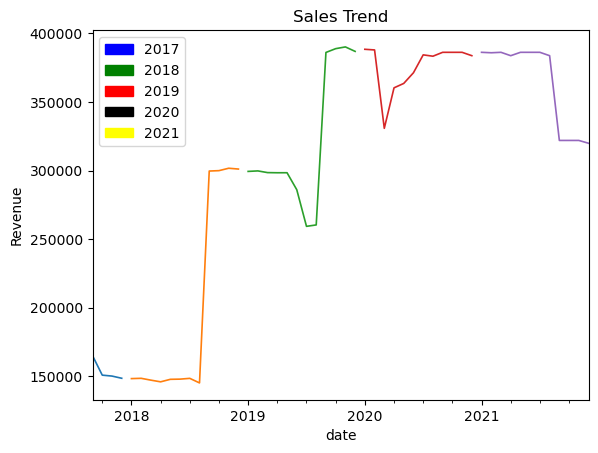

In [67]:
year1 = patches.Patch(color='blue', label='2017')
year2 = patches.Patch(color='green', label='2018')
year3 = patches.Patch(color='red', label='2019')
year4 = patches.Patch(color='black', label='2020')
year5 = patches.Patch(color='yellow', label='2021')
plot_trend(years, products)
plt.legend(handles=[year1,year2,year3,year4, year5], loc=2);

In [83]:
product_profit = products[['product','product_code', 'profit']].groupby('product').sum().sort_values(ascending=False,by='profit')
product_profit

,profit
product,
AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,7.386356e+06
AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,3.647909e+06
AQ Mforce Gen X,3.645684e+06
AQ Zion Saga,1.052380e+06


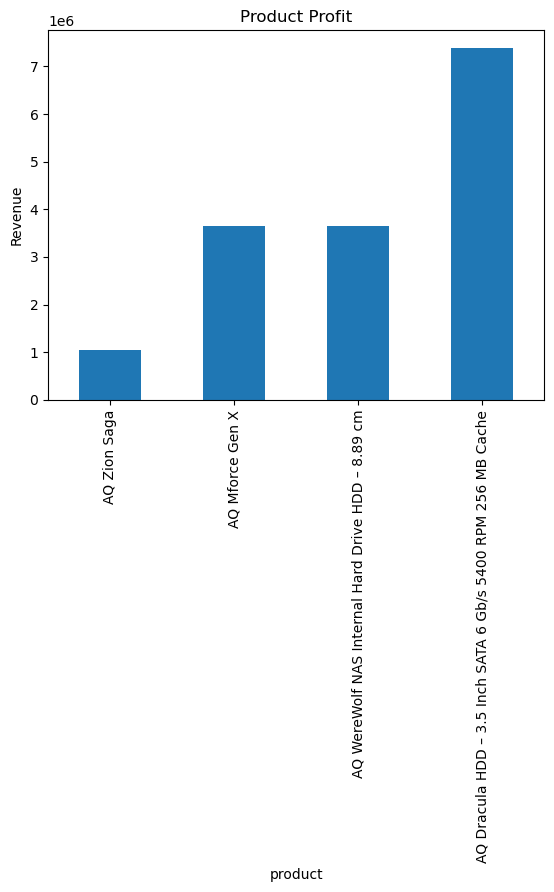

In [84]:
product_profit.groupby(by=['product'])['profit'].sum().sort_values(ascending=True).plot(
                                                                                          kind='bar',ylabel='Revenue',title='Product Profit');

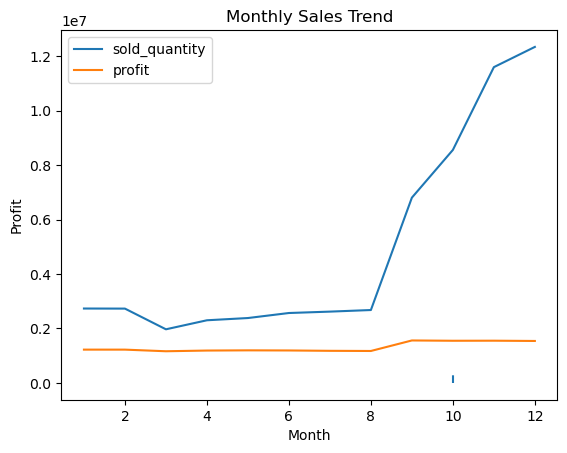

In [79]:
ax = products[['Month', 'sold_quantity', 'profit']].groupby('Month').sum().plot(
                                                                 title='Monthly Sales Trend', 
                                                                 ylabel='Profit',
                                                                 );
ax.vlines(10,1,300000, linestyles='dashed')

In [ ]:
products.groupby(products.date.dt.year)['profit'].sum()

date
2017    6.147471e+05
2018    2.382110e+06
2019    3.852431e+06
2020    4.512615e+06
2021    4.370426e+06
Name: profit, dtype: float64

In [73]:
sales_by_year = products.groupby('Year')['profit'].sum().reset_index()
fig = px.line(sales_by_year, 
              x='Year', 
              y='profit', 
              title='Yearly Sales Analysis')
fig.show()

In [74]:
sales_by_month = products.groupby('Month')['profit'].sum().reset_index()
fig = px.line(sales_by_month, 
              x='Month', 
              y='profit', 
              title='Monthly Sales Analysis')
fig.show()

In [75]:
sales_by_category = products.groupby('category')['profit'].sum().reset_index()


fig = px.pie(sales_by_category, 
             values='profit', 
             names='category', 
             hole=0.5, 
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Sales Analysis by Category', title_font=dict(size=24))

fig.show()

In [76]:
profit_by_month = products.groupby('Month')['profit'].sum().reset_index()
fig = px.line(profit_by_month, 
              x='Month', 
              y='profit', 
              title='Monthly Profit Analysis')
fig.show()

In [77]:
changes = pd.DataFrame(products.groupby([products.date.dt.year])['profit'].sum())
changes

,profit
date,
2017,6.147471e+05
2018,2.382110e+06
2019,3.852431e+06
2020,4.512615e+06
2021,4.370426e+06


<AxesSubplot:xlabel='date'>

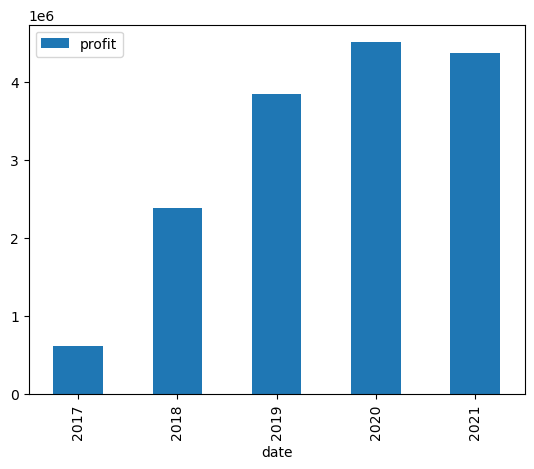

In [78]:
changes.sort_values('date').plot(kind='bar')

# Conclusion/Recommendation:


Top products from the company are: 

1. AQ Dracula HDD - 3.5 Inch SATA 6 Gb/s 54400 RPM 256 MB Cache
2. AQ WereWolf NAS Internal Hard Drive HDD - 8.89 cm
3. AQ MForce Gen X


To improve sales the company can look into:

Investing more ad revenue during the best months for sales, which are September, October and November and December, to maximize profits for the top products. AQ Zion Saga is the worst selling project, across the different years it did not perform very well, although this is the product the has the least marketing cost as well.


Rise in profit during the year 2019 with a steady increase in later years, the best year for profit was 2020. 

Top product, AQ Dracula HDD - 3.5 Inch SATA 6 Gb/s 54400 RPM 256 MB Cache, has a steady increase from 2017 to 2020 with a slight dip during 2021. 

AQ WereWolf NAS Internal Hard Drive HDD - 8.89 cm had an increase in profit from 2017 to 2019, but then had a dip afterwards, signaling that sales for this product are trending downwards, which could mean that this product is not the best investment for the future of the company. 

AQ MForce Gen X sales started in 2018, and has had a steady increase into 2021, signaling that this product is a good investment into the future of the company. 

AQ Zion Saga sales started in the year 2019 and has seen a steady increase into 2021, also signaling that this product could be a good investment into the future of the company. 




In [85]:
products.to_csv("products.csv",index=False)

LINK TO TABLEAU DASHBOARD:

https://public.tableau.com/views/Final_Project_16886144771230/ProductAnalysis?:language=en-US&:display_count=n&:origin=viz_share_link

https://public.tableau.com/app/profile/jose8079/viz/Final_Project_16886144771230/ProductAnalysis